___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings (not recommended).
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [69]:
!python --version

Python 3.8.16


In [70]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [71]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [72]:
!nvidia-smi

Mon Jan  9 20:40:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |    480MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [73]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [74]:
df2 = df.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [77]:
df.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [78]:
df.Surname.value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [79]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [80]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [81]:
df.Age.value_counts().sort_values(ascending=False)

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [82]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [83]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

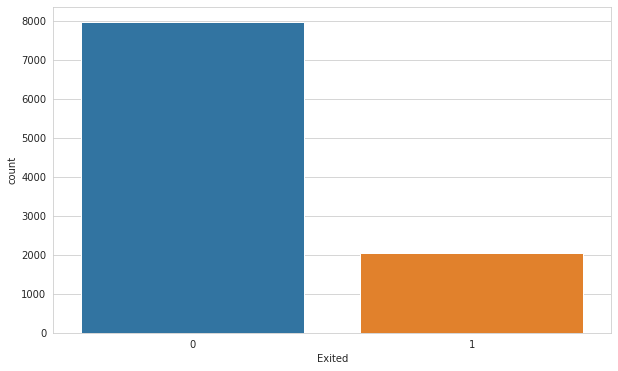

In [84]:
sns.countplot(x=df["Exited"]);

In [85]:
df.isnull().sum().any()

False

In [86]:
df.duplicated().sum()

0

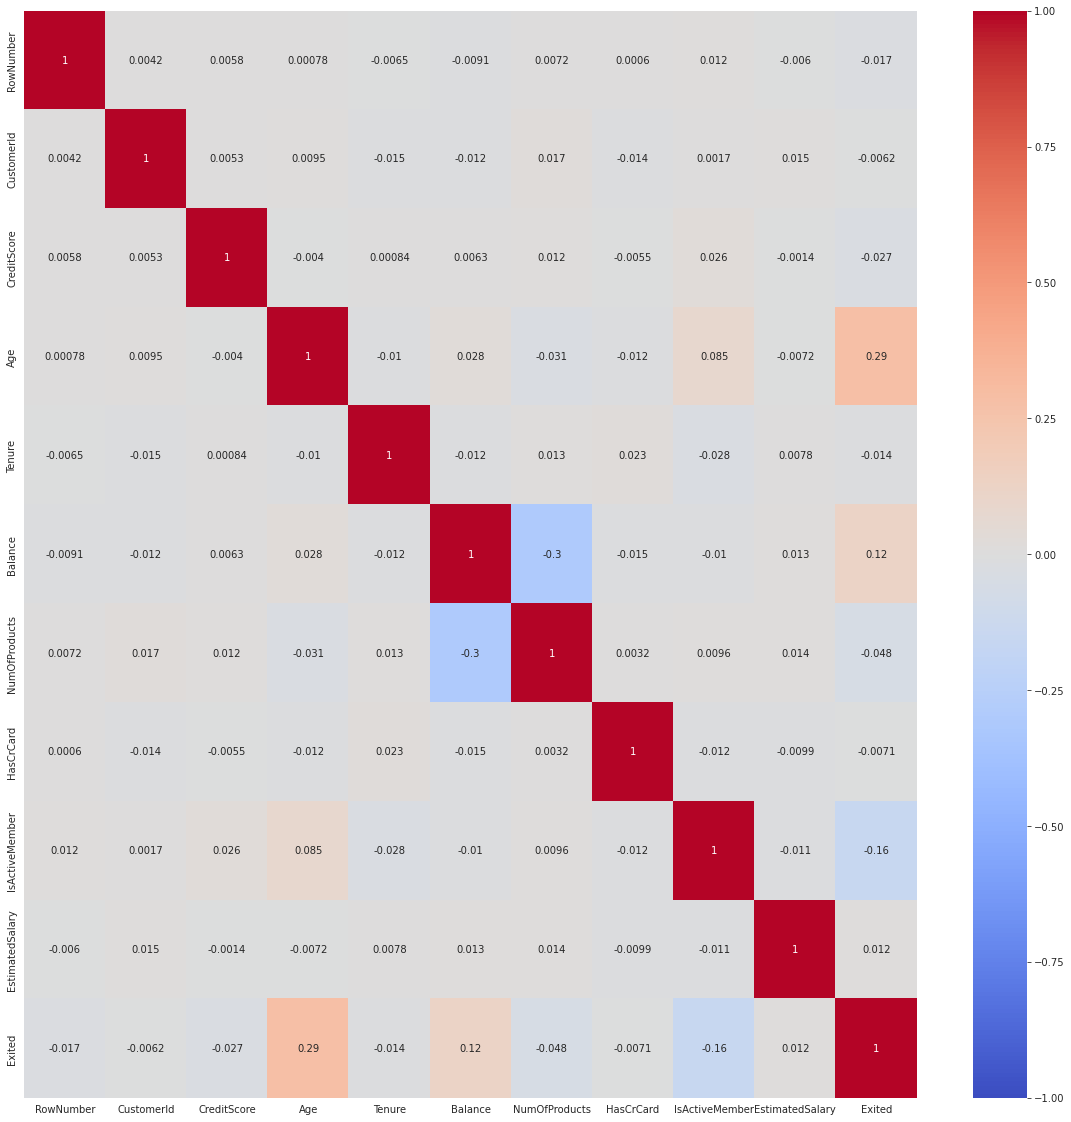

In [87]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [88]:
drop_list = ["RowNumber",
             "CustomerId",
             "Surname"]

In [89]:
df = df.drop(drop_list, axis=1)

In [90]:
df.shape

(10000, 11)

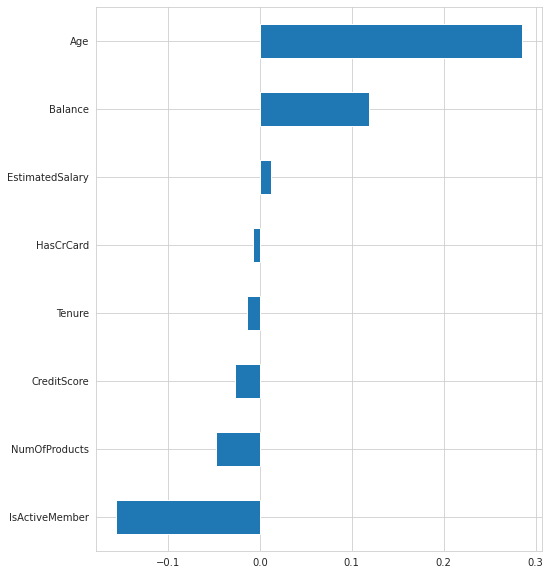

In [91]:
plt.figure(figsize=(8, 10))
(df.corr()['Exited']
 .sort_values()
 .drop("Exited")
 .plot(kind="barh"))
plt.show()

In [92]:
"""
Credit Score labeling
300-579 : Poor (0)
580-669 : Fair (1)
670-739 : Good (2)
740-799 : Very Good (3)
800-850 : Exceptional (4)
"""
df.loc[df["CreditScore"] < 580, "CreditScore"] = 0
df.loc[(df["CreditScore"] > 579) & (df["CreditScore"] < 670), "CreditScore"] = 1
df.loc[(df["CreditScore"] > 669) & (df["CreditScore"] < 740), "CreditScore"] = 2
df.loc[(df["CreditScore"] > 739) & (df["CreditScore"] < 800), "CreditScore"] = 3
df.loc[(df["CreditScore"] > 799) & (df["CreditScore"] < 851), "CreditScore"] = 4


In [93]:
df.CreditScore.value_counts()

1    3331
2    2428
0    2362
3    1224
4     655
Name: CreditScore, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [95]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [96]:
seed = 42

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=seed)

In [98]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        #drop="first", 
                        handle_unknown="ignore")

In [99]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [100]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [101]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [103]:
X_train.shape

(8500, 13)

In [104]:
X_test.shape

(1500, 13)

In [105]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])

In [106]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=200,
          verbose=1)

Epoch 1/200
60/60 [==============================] - 1s 7ms/step - loss: 0.5255 - recall: 0.0000e+00 - val_loss: 0.4952 - val_recall: 0.0000e+00
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4806 - recall: 0.0000e+00 - val_loss: 0.4721 - val_recall: 0.0000e+00
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4648 - recall: 0.0000e+00 - val_loss: 0.4642 - val_recall: 0.0000e+00
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4573 - recall: 0.0000e+00 - val_loss: 0.4589 - val_recall: 0.0000e+00
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4495 - recall: 0.0083 - val_loss: 0.4545 - val_recall: 0.0412
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4433 - recall: 0.0577 - val_loss: 0.4504 - val_recall: 0.0647
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.4373 - recall: 0.0794 - val_loss: 0.4461 - val_recall: 0.0882
Epoch 8/2

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                280       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve


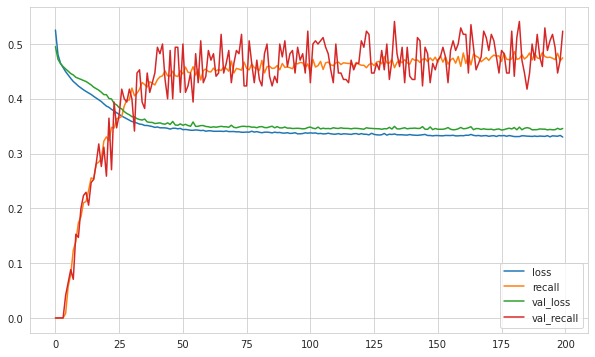

In [109]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [110]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.35440489649772644
accuracy:  0.5098039507865906


In [111]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1129   65]
 [ 150  156]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.71      0.51      0.59       306

    accuracy                           0.86      1500
   macro avg       0.79      0.73      0.75      1500
weighted avg       0.85      0.86      0.85      1500



47/47 [==============================] - 0s 1ms/step


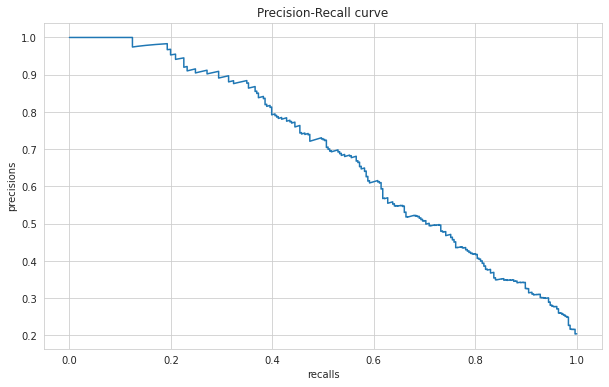

In [112]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [113]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.6854378049930087

In [114]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [115]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [116]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])

In [117]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
60/60 [==============================] - 1s 7ms/step - loss: 0.7025 - recall: 0.1518 - val_loss: 0.6424 - val_recall: 0.4412
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6584 - recall: 0.5253 - val_loss: 0.6113 - val_recall: 0.5412
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6386 - recall: 0.6041 - val_loss: 0.6100 - val_recall: 0.5706
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6254 - recall: 0.6528 - val_loss: 0.6146 - val_recall: 0.6118
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6128 - recall: 0.6630 - val_loss: 0.6255 - val_recall: 0.6588
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6032 - recall: 0.6893 - val_loss: 0.6383 - val_recall: 0.7059
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5943 - recall: 0.6970 - val_loss: 0.6139 - val_recall: 0.7000
Epoch 8/200
60/60 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

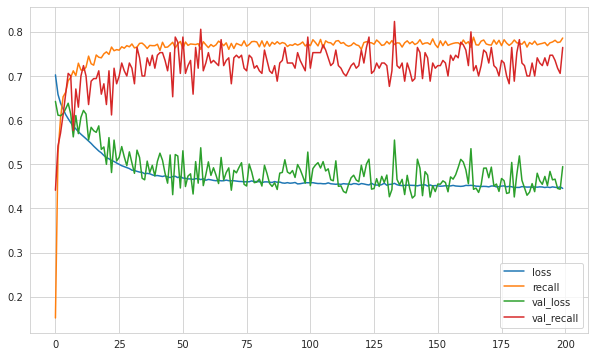

In [118]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [119]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5084675550460815
accuracy:  0.7843137383460999


In [120]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[872 322]
 [ 66 240]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1194
           1       0.43      0.78      0.55       306

    accuracy                           0.74      1500
   macro avg       0.68      0.76      0.69      1500
weighted avg       0.83      0.74      0.76      1500



47/47 [==============================] - 0s 1ms/step


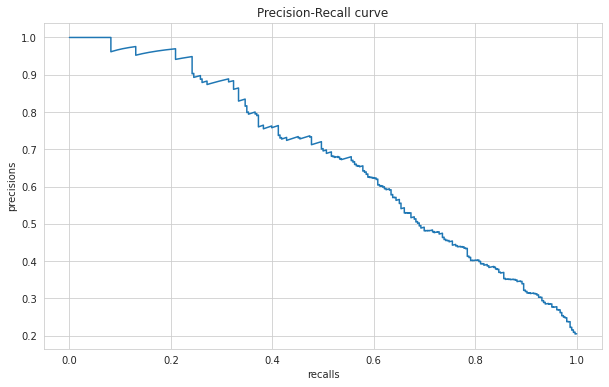

In [121]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [122]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.6740763183018686

In [123]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [126]:
from tensorflow.keras.optimizers import Adam

In [127]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [128]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
60/60 [==============================] - 2s 8ms/step - loss: 0.6544 - recall: 0.5215 - val_loss: 0.6316 - val_recall: 0.6588
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6035 - recall: 0.7053 - val_loss: 0.5862 - val_recall: 0.6118
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5837 - recall: 0.7111 - val_loss: 0.6093 - val_recall: 0.6941
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5623 - recall: 0.7124 - val_loss: 0.6010 - val_recall: 0.7059
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5474 - recall: 0.7354 - val_loss: 0.5423 - val_recall: 0.6588
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5254 - recall: 0.7617 - val_loss: 0.5524 - val_recall: 0.7235
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5112 - recall: 0.7617 - val_loss: 0.5139 - val_recall: 0.7000
Epoch 8/200
60/60 [======================

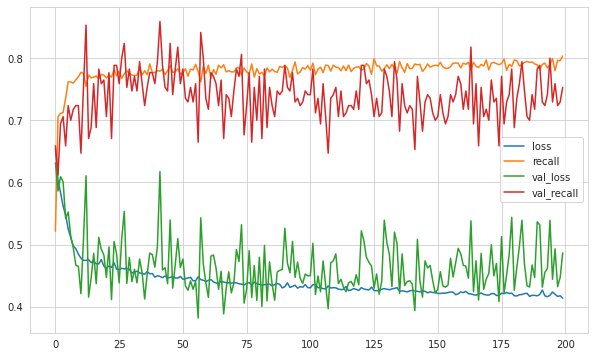

In [129]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [130]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.49676838517189026
accuracy:  0.7843137383460999


In [131]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[903 291]
 [ 66 240]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1194
           1       0.45      0.78      0.57       306

    accuracy                           0.76      1500
   macro avg       0.69      0.77      0.70      1500
weighted avg       0.83      0.76      0.78      1500



47/47 [==============================] - 0s 4ms/step


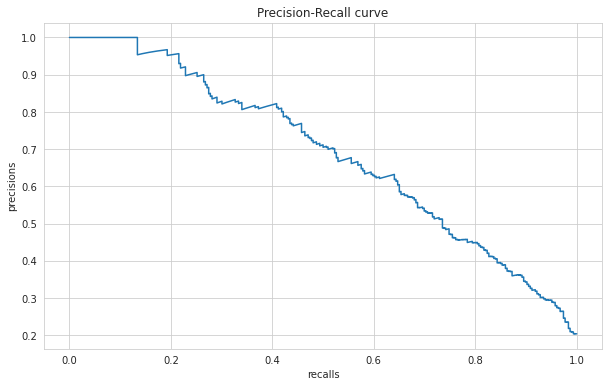

In [132]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [133]:
faster_learning_pre_score = average_precision_score(y_test, y_pred_proba)
faster_learning_pre_score  

0.6873800955660092

In [134]:
faster_learning_f1 = f1_score(y_test, y_pred)
faster_learning_recall = recall_score(y_test, y_pred)

### Add Dropout Layer

In [135]:
from tensorflow.keras.layers import Dropout

In [136]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])

In [137]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
60/60 [==============================] - 1s 7ms/step - loss: 0.7455 - recall: 0.2735 - val_loss: 0.6920 - val_recall: 0.4647
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.7018 - recall: 0.4939 - val_loss: 0.6992 - val_recall: 0.7529
Epoch 3/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6945 - recall: 0.5567 - val_loss: 0.6984 - val_recall: 0.8118
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6859 - recall: 0.6220 - val_loss: 0.6871 - val_recall: 0.7588
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6812 - recall: 0.6393 - val_loss: 0.6841 - val_recall: 0.7588
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6818 - recall: 0.6573 - val_loss: 0.6820 - val_recall: 0.7529
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6714 - recall: 0.6791 - val_loss: 0.6690 - val_recall: 0.7118
Epoch 8/200
60/60 [======================

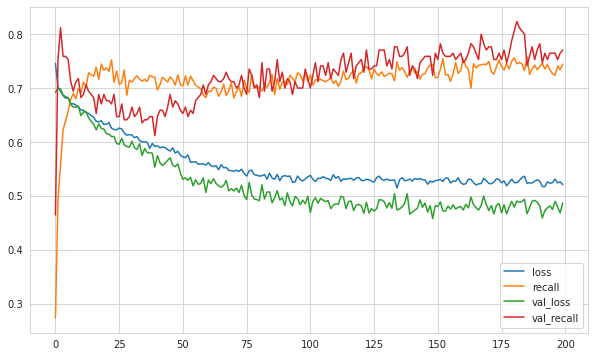

In [138]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [139]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5046047568321228
accuracy:  0.7549019455909729


In [140]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[904 290]
 [ 75 231]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1194
           1       0.44      0.75      0.56       306

    accuracy                           0.76      1500
   macro avg       0.68      0.76      0.70      1500
weighted avg       0.83      0.76      0.78      1500



47/47 [==============================] - 0s 1ms/step


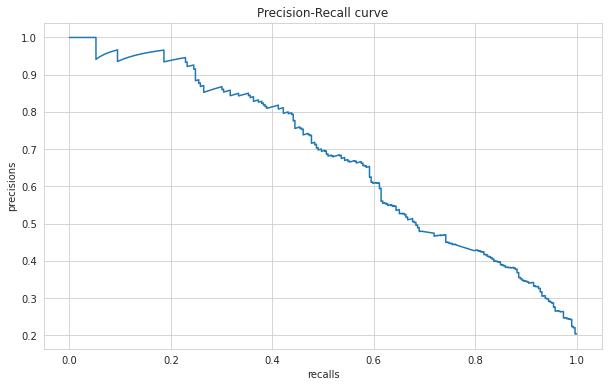

In [141]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [142]:
dropout_pre_score = average_precision_score(y_test, y_pred_proba)
dropout_pre_score 

0.6767679180054497

In [143]:
dropout_f1 = f1_score(y_test, y_pred)
dropout_recall = recall_score(y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])

In [147]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [148]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])

Epoch 1/200
60/60 [==============================] - 1s 7ms/step - loss: 0.7025 - recall: 0.1518 - val_loss: 0.6424 - val_recall: 0.4412
Epoch 2/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6584 - recall: 0.5253 - val_loss: 0.6113 - val_recall: 0.5412
Epoch 3/200
60/60 [==============================] - 0s 5ms/step - loss: 0.6386 - recall: 0.6041 - val_loss: 0.6100 - val_recall: 0.5706
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6254 - recall: 0.6528 - val_loss: 0.6146 - val_recall: 0.6118
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6128 - recall: 0.6630 - val_loss: 0.6255 - val_recall: 0.6588
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6032 - recall: 0.6893 - val_loss: 0.6383 - val_recall: 0.7059
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5943 - recall: 0.6970 - val_loss: 0.6139 - val_recall: 0.7000
Epoch 8/200
60/60 [======================

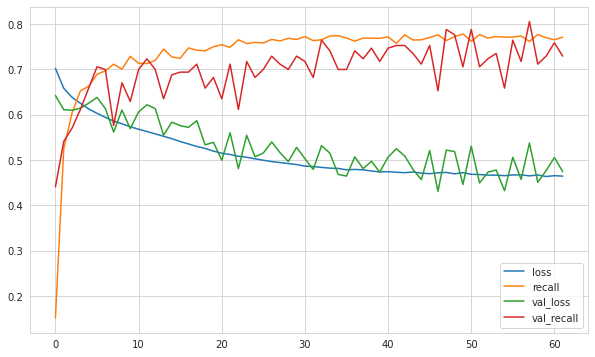

In [149]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [150]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.43258389830589294
accuracy:  0.6764705777168274


In [151]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[983 211]
 [ 99 207]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1194
           1       0.50      0.68      0.57       306

    accuracy                           0.79      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.82      0.79      0.80      1500



47/47 [==============================] - 0s 3ms/step


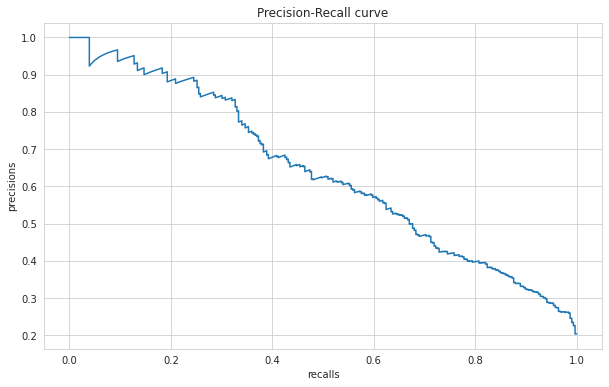

In [152]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [153]:
earlystop1_pre_score = average_precision_score(y_test, y_pred_proba)
earlystop1_pre_score 

0.6374916305277002

In [154]:
earlystop1_f1 = f1_score(y_test, y_pred)
earlystop1_recall = recall_score(y_test, y_pred)

#### Monitor the "val_recall" as metric

In [155]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])

In [156]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="min",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [157]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights,
          callbacks=[early_stop])

Epoch 1/200
60/60 [==============================] - 1s 7ms/step - loss: 0.7025 - recall: 0.1518 - val_loss: 0.6424 - val_recall: 0.4412
Epoch 2/200
60/60 [==============================] - 0s 5ms/step - loss: 0.6584 - recall: 0.5253 - val_loss: 0.6113 - val_recall: 0.5412
Epoch 3/200
60/60 [==============================] - 0s 5ms/step - loss: 0.6386 - recall: 0.6041 - val_loss: 0.6100 - val_recall: 0.5706
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6254 - recall: 0.6528 - val_loss: 0.6146 - val_recall: 0.6118
Epoch 5/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6128 - recall: 0.6630 - val_loss: 0.6255 - val_recall: 0.6588
Epoch 6/200
60/60 [==============================] - 0s 4ms/step - loss: 0.6032 - recall: 0.6893 - val_loss: 0.6383 - val_recall: 0.7059
Epoch 7/200
60/60 [==============================] - 0s 4ms/step - loss: 0.5943 - recall: 0.6970 - val_loss: 0.6139 - val_recall: 0.7000
Epoch 8/200
60/60 [======================

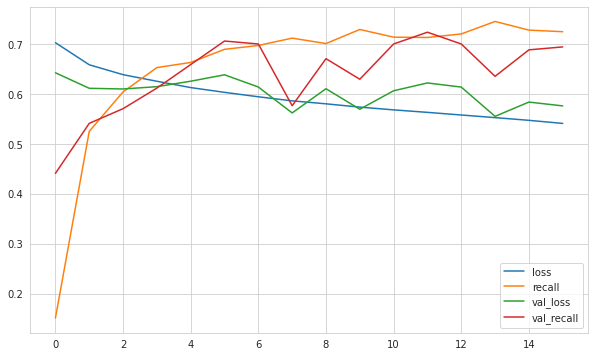

In [158]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()
plt.show()

In [159]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6478534936904907
accuracy:  0.48366013169288635


In [160]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[854 340]
 [158 148]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1194
           1       0.30      0.48      0.37       306

    accuracy                           0.67      1500
   macro avg       0.57      0.60      0.57      1500
weighted avg       0.73      0.67      0.69      1500



47/47 [==============================] - 0s 1ms/step


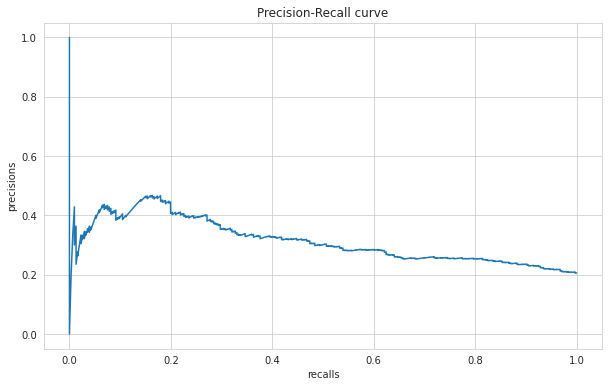

In [161]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [162]:
earlystop2_pre_score = average_precision_score(y_test, y_pred_proba)
earlystop2_pre_score 

0.3141797379464347

In [163]:
earlystop2_f1 = f1_score(y_test, y_pred)
earlystop2_recall = recall_score(y_test, y_pred)

## GridSearchCV

In [170]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [165]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
    classifier.add(Dense(10, activation="relu"))
    classifier.add(Dense(1, activation="sigmoid"))
    classifier.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["Recall"])
    return classifier

In [166]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=15,
                           restore_best_weights=True)

In [171]:
classifier_model = KerasClassifier(build_fn=build_classifier, validation_split=0.1, epochs=200)

parameters = {'batch_size': [64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.005]}

grid_model = GridSearchCV(estimator=classifier_model,
                          param_grid=parameters,
                          scoring='recall',
                          cv=10,
                          #n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train,
               y_train,
               callbacks=[early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200


<ipython-input-171-e07ee699cfbe>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(build_fn=build_classifier, validation_split=0.1, epochs=200)


Streaming output truncated to the last 5000 lines.
Epoch 67/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3400 - recall: 0.4557 - val_loss: 0.3392 - val_recall: 0.4774
Epoch 68/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3406 - recall: 0.4364 - val_loss: 0.3395 - val_recall: 0.5161
Epoch 69/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3399 - recall: 0.4557 - val_loss: 0.3378 - val_recall: 0.4839
Epoch 70/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3393 - recall: 0.4536 - val_loss: 0.3408 - val_recall: 0.5419
Epoch 71/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3417 - recall: 0.4579 - val_loss: 0.3458 - val_recall: 0.5548
Epoch 72/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3391 - recall: 0.4529 - val_loss: 0.3377 - val_recall: 0.4839
Epoch 73/200
108/108 [==============================] - 1s 5ms/step - loss: 0.3391 - recall: 0.4486 - val_los

KeyboardInterrupt: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
loss_df = pd.DataFrame(grid_model.history.history)

loss_df.plot()
plt.show()

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___